<a href="https://colab.research.google.com/github/TheNobody-12/SCL-MEITy-Project-2022/blob/main/DENSENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model
input_shape = 100, 100, 3
n_classes = 6
model = densenet(input_shape,n_classes)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 50, 50, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 25, 25, 64)  0           ['conv2d_121[0][0]']             
                                                                                                  
 batch_normalization_120 (Batch  (None, 25, 25, 64)  256         ['max_pooling2d_1[0][0]']  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
import pickle
X =pickle.load(open("/content/drive/MyDrive/Xnew2.pkl", "rb"))
Y =pickle.load(open("/content/drive/MyDrive/Ynew2.pkl", "rb"))
X=X/255
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
148/148 [==============================] - 42s 122ms/step - loss: 1.8056 - accuracy: 0.4274 - val_loss: 2.7359 - val_accuracy: 0.3188
Epoch 2/100
148/148 [==============================] - 15s 103ms/step - loss: 1.2777 - accuracy: 0.5386 - val_loss: 1.4264 - val_accuracy: 0.4915
Epoch 3/100
148/148 [==============================] - 15s 103ms/step - loss: 1.0351 - accuracy: 0.6324 - val_loss: 2.6422 - val_accuracy: 0.3454
Epoch 4/100
148/148 [==============================] - 15s 105ms/step - loss: 0.8127 - accuracy: 0.7190 - val_loss: 2.7145 - val_accuracy: 0.3833
Epoch 5/100
148/148 [==============================] - 16s 105ms/step - loss: 0.6906 - accuracy: 0.7631 - val_loss: 1.4968 - val_accuracy: 0.4801
Epoch 6/100
148/148 [==============================] - 16s 105ms/step - loss: 0.5957 - accuracy: 0.7950 - val_loss: 2.5623 - val_accuracy: 0.5180
Epoch 7/100
148/148 [==============================] - 16s 106ms/step - loss: 0.4920 - accuracy: 0.8288 - val_loss: 0.9492 -

In [ ]:
model.save('/content/drive/MyDrive/Densenet121.h5')

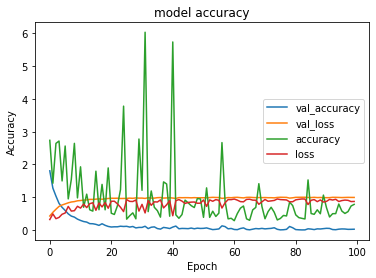

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_loss'])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["val_accuracy","val_loss","accuracy","loss"],loc="center right")
plt.savefig("_Model41")
 